<a href="https://colab.research.google.com/github/rizzaesh/Thesis---a-two-layer-power-network/blob/main/Simulator_trying_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly
from fa2 import ForceAtlas2

In [2]:
Network = pn.case14
Net = Network()

In [3]:
Gr = top.create_nxgraph(Net)

In [4]:
seed = 10
pos = nx.spring_layout(Gr,seed=seed)

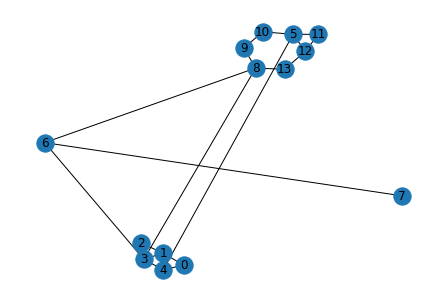

In [5]:
nx.draw(Gr, pos = pos, with_labels=True)
plt.show()

In [59]:
N = len(Gr.nodes())
alpha = 0.49
beta = 0.49
gamma = 1 -(alpha + beta)
scale = nx.scale_free_graph(n = N,alpha=alpha,beta=beta,gamma=gamma)
len(scale.edges())

23

[]
radius: 2
diameter: 3
eccentricity: {0: 2, 1: 2, 2: 2, 3: 3, 4: 2, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3}
center: [0, 1, 2, 4]
periphery: [3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
density: 0.17582417582417584


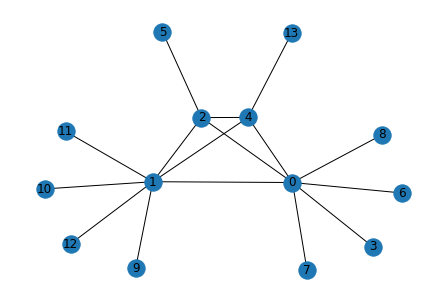

In [124]:
G = nx.Graph(scale)
G.edges()
G = preprocessingComNetwork(G)
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}") #maximum lenght
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
print(f"density: {nx.density(G)}")
nx.draw(G, with_labels=True)
plt.show()

[]


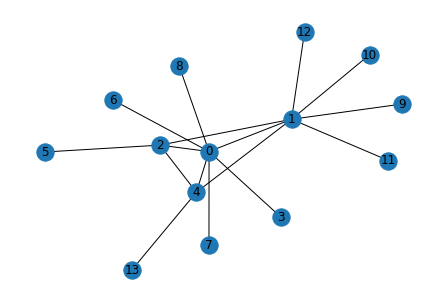

In [121]:
nx.draw(G, with_labels=True)
plt.show()

In [125]:
duplicated(G)

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 1,  2],
       [ 1,  4],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 2,  4],
       [ 2,  5],
       [ 4, 13]])

In [127]:
def duplicated(Gprime):
    edges = list(Gprime.edges()) 
    edges = np.array(edges)
    edges

In [129]:
edges = list(G.edges()) 
setedges = set(edges)
len(setedges),len(edges)

(16, 16)

In [30]:
def preprocessingComNetwork(Com_Network):
    edges = list(Com_Network.edges())
    remove_edges = list()
    for edge in edges:
        # print(edge)
        if ((edge[1],edge[0]) in edges and (edge[0],edge[1] in edges)) or edge[0]==edge[1]:
            remove_edges.append(edge)
    Com_Network.remove_edges_from(remove_edges)
    print(remove_edges)
    return Com_Network

In [ ]:
scal.edges()

MultiEdgeDataView([(0, 1), (0, 1), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 3), (0, 3), (0, 3), (0, 7), (0, 9), (0, 9), (0, 11), (1, 2), (1, 2), (1, 2), (1, 4), (1, 10), (2, 3), (2, 3), (2, 3), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 7), (2, 7), (2, 6), (2, 9), (2, 13), (3, 5), (3, 5), (3, 5), (3, 10), (4, 5), (4, 8), (4, 12), (5, 7)])

# Shit that happened

In [ ]:
betas = np.arange(0.001,0.8,0.01)
data= []
for beta in betas:
    for alpha in np.arange(0.001,1-beta-0.01,0.01):
        gamma = 1 -(alpha + beta)
        G = nx.scale_free_graph(n=N, alpha=alpha, beta=beta, gamma=gamma)
        data.append([beta,alpha,alpha/beta,gamma,len(G.edges()),len(set(G.edges()))])
data = np.array(data)
datas = pd.DataFrame()
datas['beta'] = data.T[0]
datas['alpha'] = data.T[1]
datas['alpha/beta'] = data.T[2]
datas['gamma'] = data.T[3]
datas['len(G.nodes())'] = data.T[4]
datas['set(nodes)'] = data.T[5]

100%|██████████| 1000/1000 [00:00<00:00, 34890.02it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


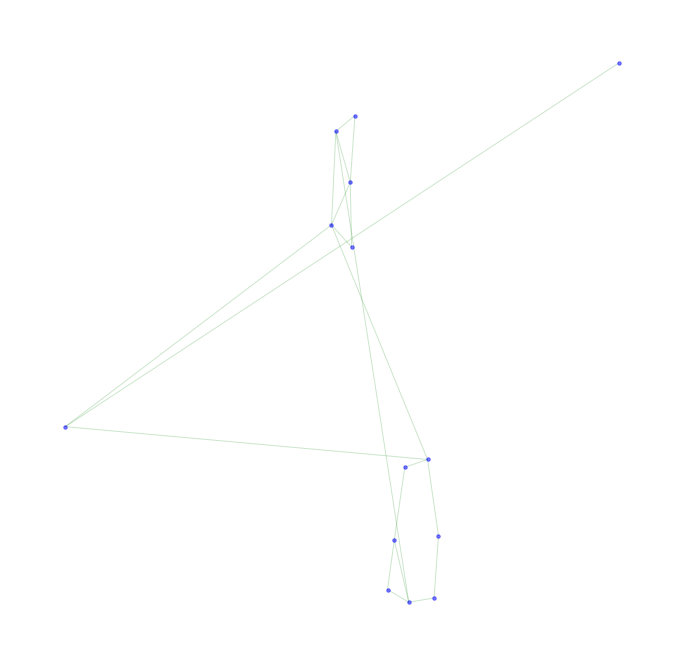

In [ ]:
pos = atlas(Gr,1)

In [ ]:
def atlas(Grand,l=None):
    # G = nx.random_geometric_graph(4000, 0.3)
    G = Grand
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            # outboundAttractionDistribution=True,  # Dissuade hubs
                            # linLogMode=False,  # NOT IMPLEMENTED
                            # adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                            # edgeWeightInfluence=1.0,

                            # # Performance
                            # jitterTolerance=1.0,  # Tolerance
                            # barnesHutOptimize=True,
                            # barnesHutTheta=1.2,
                            # multiThreaded=False,  # NOT IMPLEMENTED

                            # # Tuning
                            # scalingRatio=2.0,
                            # strongGravityMode=False,
                            # gravity=1.0,

                            # Log
                            verbose=True)
    plt.figure(3,figsize=(12,12))
    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)
    if l:
        nx.draw_networkx_nodes(G, positions, node_size=12, node_color="blue", alpha=0.5)
        nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.2)
        plt.axis('off')
        plt.show()
    return positions
    # # equivalently
    # import igraph
    # G = igraph.Graph.TupleList(G.edges(), directed=False)
    # layout = forceatlas2.forceatlas2_igraph_layout(G, pos=None, iterations=2000)
    # igraph.plot(G, layout).show()

# Other shits

In [ ]:
import cython

In [ ]:
def f(x): 
    return x ** 2 - x 
 
def integrate_f(a, b, N): 
    s = 0 
    dx = (b - a) / N 
    for i in range(N): 
        s += f(a + i * dx) 
    return s * dx 

In [ ]:
integrate_ff(1, 10, 100000000)

283.4999959500879

In [ ]:
@cython.cfunc 
@cython.exceptval(-2, check=True) 
def f(x: cython.double) -> cython.double: 
    return x ** 2 - x 
def integrate_ff(a: cython.double, b: cython.double, N: cython.int): 
    i: cython.int 
    s: cython.double 
    dx: cython.double 
    s = 0 
    dx = (b - a) / N 
    for i in range(N): 
        s += f(a + i * dx) 
    return s * dx 